In [ ]:
url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"

import pandas as pd

df= pd.read_csv(url,error_bad_lines=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,min,max,mean
sex,,,
female,0.75,63.0,28.067407
male,0.42,80.0,30.493569


,min,max,mean
sex,,,
female,0.75,63.0,28.067407
male,0.42,80.0,30.493569


In [ ]:
class TitanicData():

    def __init__(self, url):
        self.load_df(url)
        self.lowercase_colums()
        self.remove_na()

        self.survived_people()
        self.age_statistics()

    def show_report(self):
        print(f"{self.people_survived} survived the accident.")
        print(f"Average age of the passanger is {self.age_average}, minimum is {self.age_min}, and maximum is {self.age_max}")

    def load_df(self, url):
        self.df= pd.read_csv(url)
        
    def lowercase_colums(self):
        self.df.columns = self.df.columns.str.lower()
    
    def remove_na(self):
        self.df = self.df.drop("cabin", axis=1)

        _idx_to_drop = self.df[self.df["embarked"].isna()].index
        self.df = self.df.drop(_idx_to_drop, axis = 0)

        value_to_fill = self.df["age"].mean()
        self.df["age"] = self.df["age"].fillna(value_to_fill)

    def survived_people(self):
        self.people_survived = self.df[self.df["survived"] == 1]["survived"].count()

    def age_statistics(self):
        self.age_average = test.df["age"].mean()
        self.age_min = test.df["age"].min()
        self.age_max = test.df["age"].max()

        test.df.groupby("sex")["age"].agg(["min", "max", "mean"])
        

test = TitanicData(url)
test.show_report()

340 survived the accident.
Average age of the passanger is 29.642092696629216, minimum is 0.42, and maximum is 80.0


In [ ]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

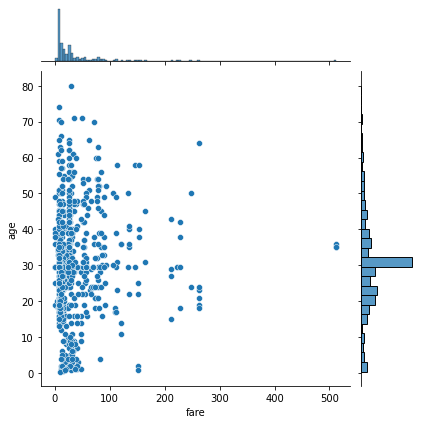

In [ ]:
sns.jointplot(data = test.df, x='fare', y='age')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare'>

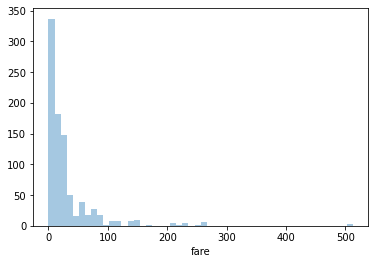

In [ ]:
sns.distplot(test.df["fare"], kde=False)

<AxesSubplot:xlabel='pclass', ylabel='age'>

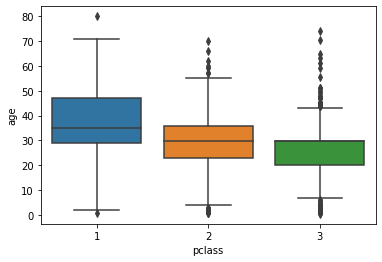

In [ ]:
sns.boxplot(data=test.df, x='pclass',y='age')


In [ ]:
test.df["sex"].value_counts()

male      577
female    312
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

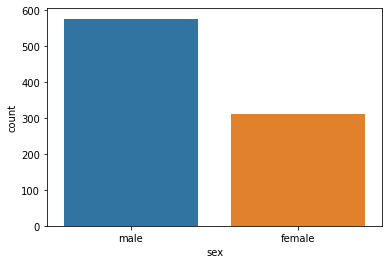

In [ ]:
sns.countplot(x='sex',data=test.df)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

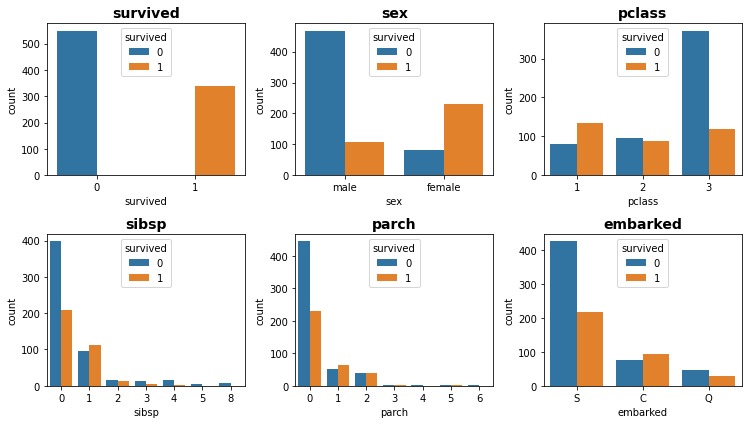

In [ ]:
cols = ['survived', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(test.df[cols[i]], hue=test.df["survived"], ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 
        
plt.tight_layout()   

<AxesSubplot:>

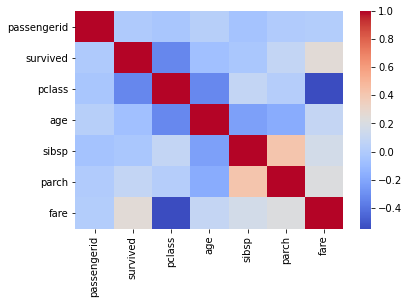

In [ ]:
tc = test.df.corr()
sns.heatmap(tc, cmap="coolwarm")

<AxesSubplot:xlabel='sex', ylabel='count'>

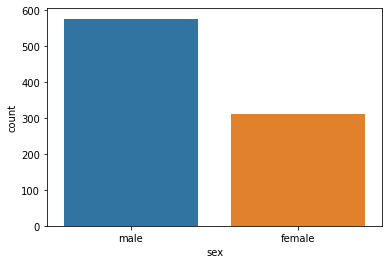

In [ ]:
sns.countplot(x='sex',data=test.df)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


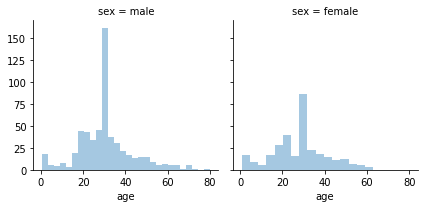

In [ ]:
graph = sns.FacetGrid(data=test.df, col="sex")
graph.map(sns.distplot, "age", kde=False)

<AxesSubplot:xlabel='pclass', ylabel='age'>

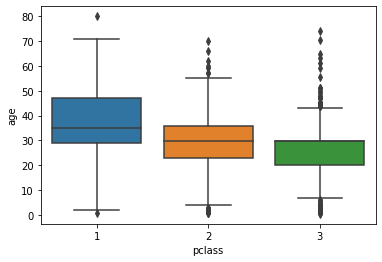

In [ ]:
sns.boxplot(data=test.df, 
            x='pclass',
            y='age')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>